https://pysdr.org/content/sampling.html,,
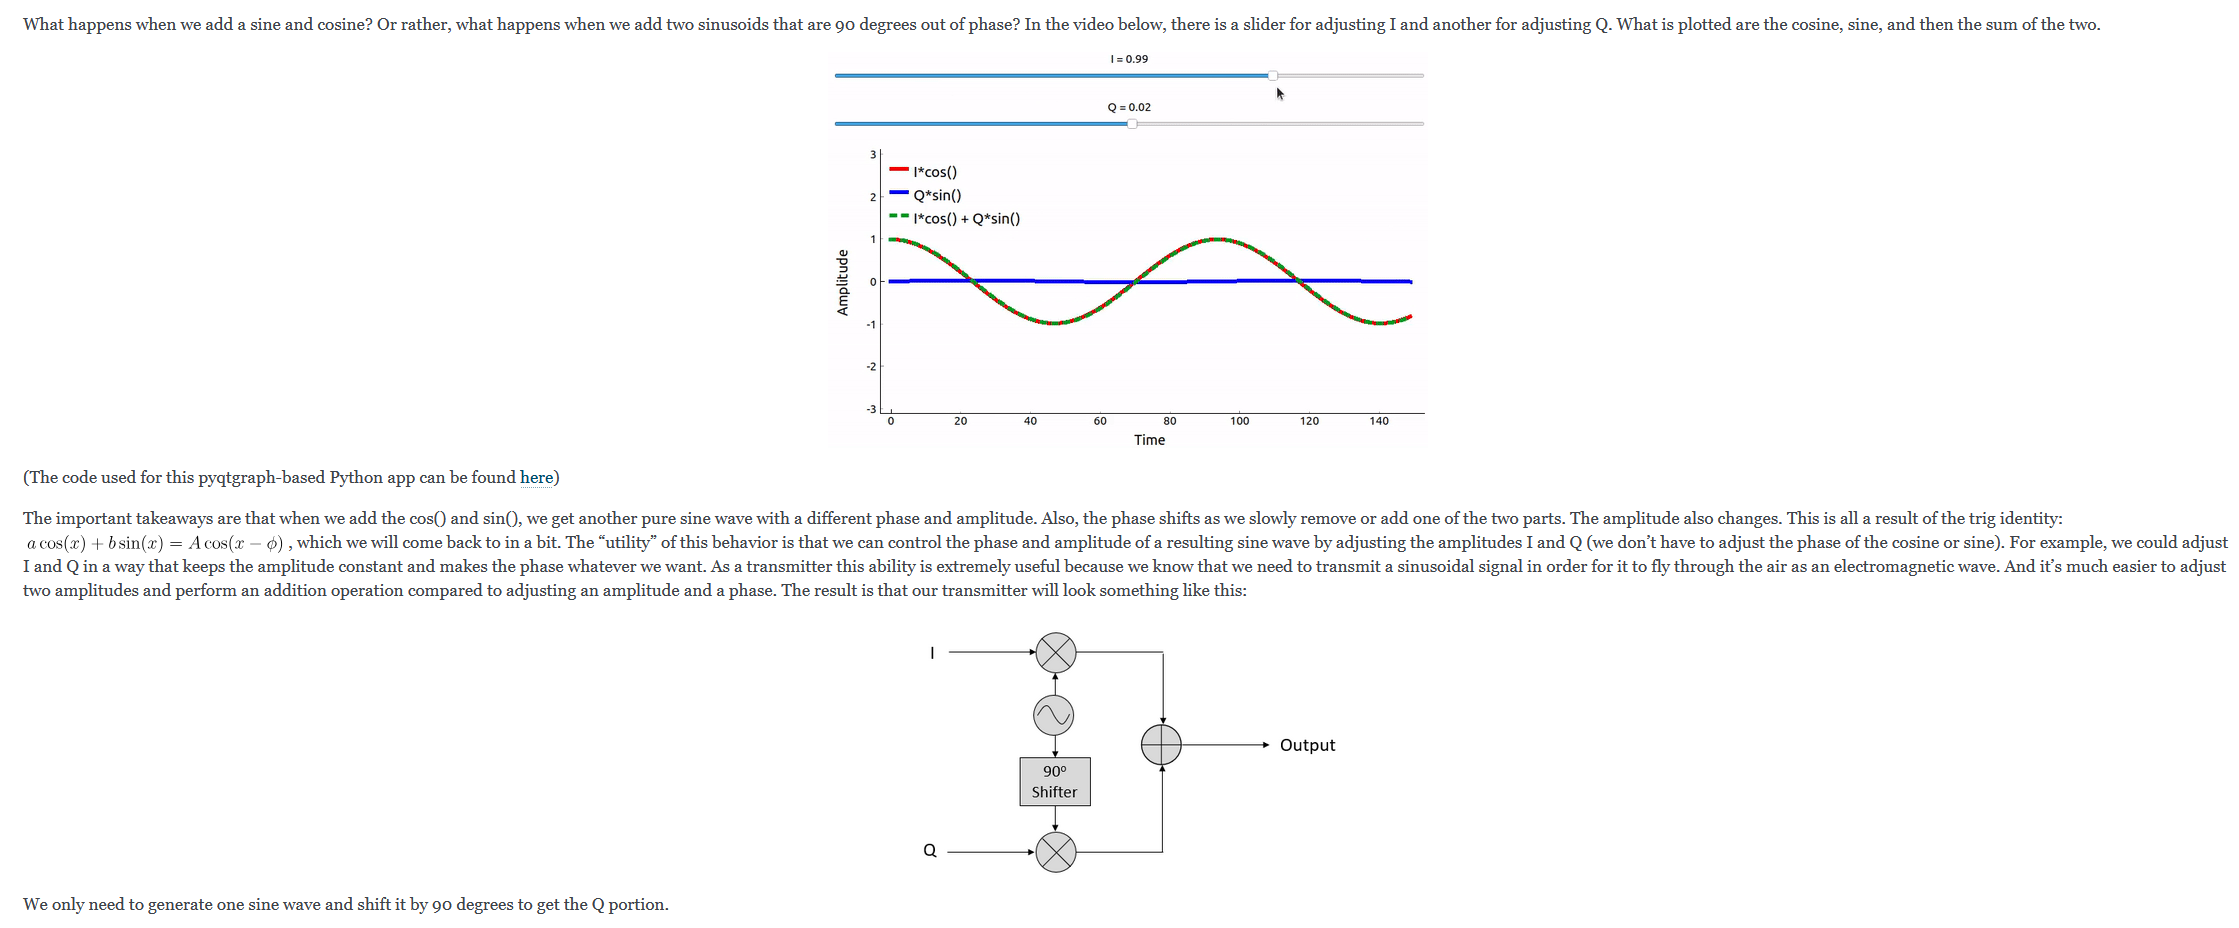

Here is a full code example that includes generating a signal (complex exponential at 50 Hz) and noise. Note that N, the number of samples to simulate, becomes the FFT length because we take the FFT of the entire simulated signal.

But to actually find the PSD of a batch of samples and plot it, we do more than just take an FFT. We must do the following six operations to calculate PSD:

    Take the FFT of our samples. If we have x samples, the FFT size will be the length of x by default. Let’s use the first 1024 samples as an example to create a 1024-size FFT. The output will be 1024 complex floats.

    Take the magnitude of the FFT output, which provides us 1024 real floats.

    Square the resulting magnitude to get power.

    Normalize: divide by the FFT size (N) and sample rate (Fs).

    Convert to dB using 10 \log_{10}(); we always view PSDs in log scale.

    Perform an FFT shift, covered in the previous chapter, to move “0 Hz” in the center and negative frequencies to the left of center.


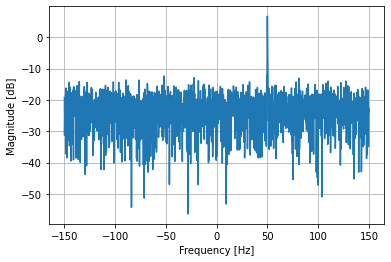

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Fs = 300 # sample rate
Ts = 1/Fs # sample period
N = 2048 # number of samples to simulate

t = Ts*np.arange(N)
x = np.exp(1j*2*np.pi*50*t) # simulates sinusoid at 50 Hz

n = (np.random.randn(N) + 1j*np.random.randn(N))/np.sqrt(2) # complex noise with unity power
noise_power = 2
r = x + n * np.sqrt(noise_power)

PSD = np.abs(np.fft.fft(r))**2 / (N*Fs)
PSD_log = 10.0*np.log10(PSD)
PSD_shifted = np.fft.fftshift(PSD_log)

f = np.arange(Fs/-2.0, Fs/2.0, Fs/N) # start, stop, step

plt.plot(f, PSD_shifted)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.grid(True)
plt.show()